In [128]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Fase 1:
  Carregar os dados e fazer uma analise explorátoria.

In [129]:
#Carrega
pd.set_option('display.max_columns', None)
train_data = pd.read_csv("train.csv")
train_data.head(1)

<ipython-input-129-2141648e9f88>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good


In [130]:
# Verificar Colunas, tipos
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

## Atenção para Colunas que a priore deveriam ser núméricas:
  - Age
  - Anual_income
  - Num_of_loan
  - Num_of_delayed_payment
  - Outstanding_Debt
  - Amount_invested_monthly
  - Monthly_Balance

In [131]:
train_data['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [132]:
train_data['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [133]:
train_data['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [134]:
train_data["Num_of_Delayed_Payment"].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [135]:
train_data["Changed_Credit_Limit"].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [136]:
train_data['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [137]:
train_data['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)

In [138]:
train_data["Monthly_Balance"].unique().tolist()

['312.49408867943663',
 '284.62916249607184',
 '331.2098628537912',
 '223.45130972736786',
 '341.48923103222177',
 '340.4792117872438',
 '244.5653167062043',
 '358.12416760938714',
 '470.69062692529184',
 '484.5912142650067',
 '466.46647639764313',
 '465.6762241330048',
 '444.8670318506144',
 '481.505261949182',
 '464.8806778859809',
 '356.07810855965045',
 '1043.3159778669492',
 '998.8692967863226',
 '715.741367403555',
 '426.5134106068658',
 '810.7821526659284',
 '963.9215811205684',
 '968.5555173846187',
 '895.494583180492',
 '433.6047729627723',
 '409.95181177115995',
 '411.42712287098345',
 '262.4995942778403',
 '359.37491550776383',
 '419.8807835023488',
 '443.5499567906391',
 '379.21638114119577',
 '288.60552234930395',
 '460.88727561667037',
 '392.1922656650829',
 '438.5454315807922',
 '482.6076383223166',
 '497.6872787770267',
 '394.31893393507744',
 '364.00001570479753',
 '740.1960900583389',
 '705.931285531244',
 '698.8107657019921',
 '270.66810874941655',
 '690.918664313912

Alguns dados dessas colunas contém um "underline" (\_) que iremos retirar. A Monthly_Balance e Outstanding_Debt, parece que apenas uma definição simples de numerical resolveria.

In [139]:
try:
    pd.to_numeric(train_data["Monthly_Balance"])

except Exception:
    print(Exception)


<class 'Exception'>


Deu errado... vou tratá-la

In [140]:
try:
  pd.to_numeric(train_data["Outstanding_Debt"])

except Exception:
    print(Exception)

<class 'Exception'>


Deu errado... vou tratá-la também.

In [141]:
train_data['Age'] = pd.to_numeric(train_data['Age'].str.replace('_', ''), errors='coerce')
train_data['Annual_Income'] = pd.to_numeric(train_data['Annual_Income'].str.replace('_', ''), errors='coerce')
train_data['Num_of_Loan'] = pd.to_numeric(train_data['Num_of_Loan'].str.replace('_', ''), errors='coerce')
train_data['Num_of_Delayed_Payment'] = pd.to_numeric(train_data['Num_of_Delayed_Payment'].str.replace('_', ''), errors='coerce')
train_data['Changed_Credit_Limit'] = pd.to_numeric(train_data['Changed_Credit_Limit'].str.replace('_', ''), errors='coerce')
train_data['Outstanding_Debt'] = pd.to_numeric(train_data['Outstanding_Debt'].str.replace('_', ''), errors='coerce')
train_data['Amount_invested_monthly'] = pd.to_numeric(train_data['Amount_invested_monthly'].str.replace('_', ''), errors='coerce')
train_data['Monthly_Balance'] = pd.to_numeric(train_data['Monthly_Balance'].str.replace('_', ''), errors='coerce')


In [142]:
train_data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

## Atenção para as colunas com valores ausentes:
  - Name
  - Monthly_inhand_salary
  - Type_of_loan
  - Num_of_delayed_payments
  - Changed_Credit_Limit
  - Num_Credit_inquires
  - Credit_history_age
  - Amount_invested_monthly
  - Monthly_balance

In [143]:
train_data[["Name", "Monthly_Inhand_Salary", "Type_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Credit_History_Age", "Amount_invested_monthly", "Monthly_Balance"]].head()

,Name,Monthly_Inhand_Salary,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
0,Aaron Maashoh,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7.0,11.27,4.0,22 Years and 1 Months,80.415295,312.494089
1,Aaron Maashoh,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,4.0,NaN,118.280222,284.629162
2,Aaron Maashoh,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7.0,NaN,4.0,22 Years and 3 Months,81.699521,331.209863
3,Aaron Maashoh,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4.0,6.27,4.0,22 Years and 4 Months,199.458074,223.451310
4,Aaron Maashoh,1824.843333,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,4.0,22 Years and 5 Months,41.420153,341.489231


Name e Type_of Loan são categorias,

Credit_History_Age pode ser númerica mas precisa ser tratada, vamos converter para meses.

O Resto é numerico, vamos verificar qual melhor tratamento.

In [144]:
# Função para converter a idade do histórico de crédito para um valor numérico em meses
def credit_history_to_months(age_str):
    if isinstance(age_str, str):
        years_months = age_str.split(' and ')
        total_months = 0
        for part in years_months:
            if 'Year' in part:
                total_months += int(part.split(' ')[0]) * 12
            elif 'Month' in part:
                total_months += int(part.split(' ')[0])
        return total_months
    return np.nan

# Aplicando a função de conversão à coluna "Credit_History_Age"
train_data['Credit_History_Months'] = train_data['Credit_History_Age'].apply(credit_history_to_months)

In [145]:
train_data[["Monthly_Inhand_Salary","Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Amount_invested_monthly", "Monthly_Balance", "Credit_History_Months"]].describe()

,Monthly_Inhand_Salary,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
count,84998.000000,92998.000000,97909.000000,98035.000000,95521.000000,9.713200e+04,90970.000000
mean,4194.170850,30.923342,10.389025,27.754251,637.412998,-3.088580e+22,221.195405
std,3183.686167,226.031892,6.789496,193.177339,2043.319327,3.208492e+24,99.741364
min,303.645417,-3.000000,-6.490000,0.000000,0.000000,-3.333333e+26,1.000000
25%,1625.568229,9.000000,5.320000,3.000000,74.534002,2.699858e+02,144.000000
50%,3093.745000,14.000000,9.400000,6.000000,135.925682,3.364493e+02,219.000000
75%,5957.448333,18.000000,14.870000,9.000000,265.731733,4.696405e+02,302.000000
max,15204.633333,4397.000000,36.970000,2597.000000,10000.000000,1.602041e+03,404.000000


Desse resumo podemos ver que a média, está batante longe da mediana na maioria, Isso indica outlier. Vamos substituir os valores nulos pelas medianas então.

In [146]:
colunas_numericas = ["Monthly_Inhand_Salary","Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Amount_invested_monthly", "Monthly_Balance", "Credit_History_Months"]
train_data[colunas_numericas] = train_data[colunas_numericas].apply(lambda x: x.fillna(x.median()),axis=0)

Para as outras, vamos usar a moda

In [147]:
colunas_cat = ["Name", "Type_of_Loan"]
train_data[colunas_cat] = train_data[colunas_cat].apply(lambda x: x.fillna(x.mode()),axis=0)

Verificando o número de categorias únicas em cada coluna categórica

In [148]:
colunas_cat = train_data.select_dtypes(include=[object]).columns
categoricos_unicos = train_data[colunas_cat].nunique()
categoricos_unicos

ID                       100000
Customer_ID               12500
Month                         8
Name                      10139
SSN                       12501
Occupation                   16
Type_of_Loan               6260
Credit_Mix                    4
Credit_History_Age          404
Payment_of_Min_Amount         3
Payment_Behaviour             7
Credit_Score                  3
dtype: int64

In [149]:
drop_columns = ["ID","Customer_ID","Name","SSN", "Credit_History_Age", "Month"]
train_data = train_data.drop(columns=drop_columns)

Text(0.5, 1.0, 'Correlação entre Fatores')

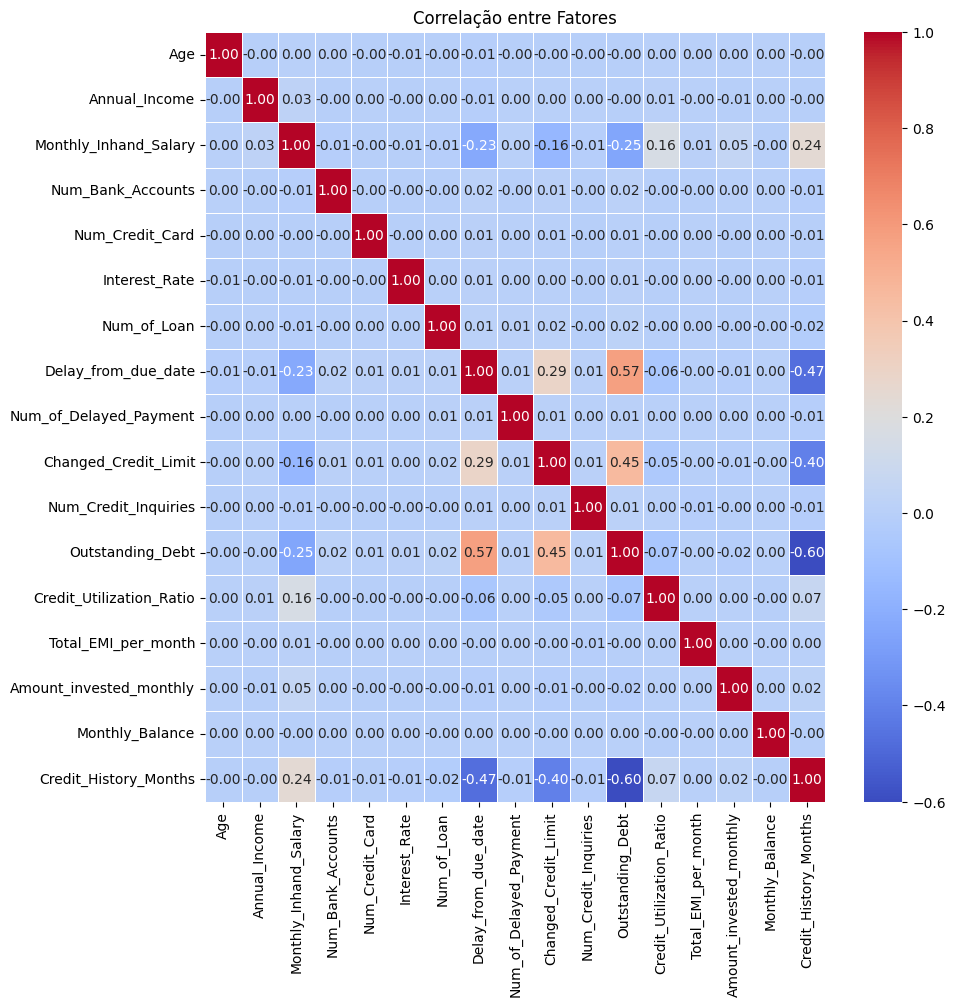

In [150]:
# PQ?
colunas_numericas = train_data.select_dtypes(include=['number'])
correlation_matrix = colunas_numericas.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação entre Fatores')
# Ainda Assim: Outsanding_debt x Num_of_delayed Payment tem alta corelção (duh)
# E Idade do Crédito x Outsanding Debt tem correlação inversa.

Avaliação da possivel variavel "target" `Credit_score`

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

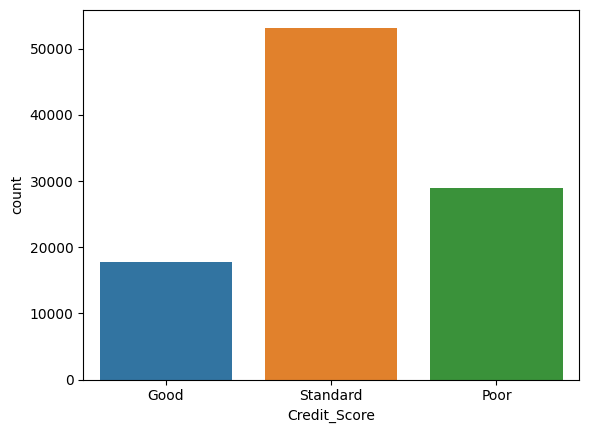

In [151]:
sns.countplot(x='Credit_Score', data=train_data)
train_data['Credit_Score'].value_counts()

In [152]:
type_of_loan_value_counts = train_data['Type_of_Loan'].value_counts()

type_of_loan_value_counts

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

Modemos tratar o Type_of_Loan, pois ela contem dados agregados separados por vírgula.

In [153]:
train_data['Type_of_Loan'] = train_data['Type_of_Loan'].fillna('') #Ja era pre estar tratado nao entendi

In [154]:
unique_loan_types = set()
train_data['Type_of_Loan'].str.split(', ').apply(unique_loan_types.update)
# Criando novas colunas binárias para cada tipo de empréstimo
for loan_type in unique_loan_types:
    train_data[f'Loan_Type_{loan_type}'] = train_data['Type_of_Loan'].str.contains(loan_type, na=False).astype(int)

# Descartando a coluna original "Type_of_Loan"
train_data.drop(columns=['Type_of_Loan'], inplace=True)

In [155]:
# Aplicando a codificação one-hot nas colunas categóricas restantes
train_data = pd.get_dummies(train_data, columns=['Occupation', 'Payment_Behaviour', 'Credit_Mix', 'Payment_of_Min_Amount'])

# Modelo de Random Forrest

In [156]:
X = train_data.drop(columns=['Credit_Score'])
y = train_data['Credit_Score']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificando as primeiras linhas do conjunto de treinamento
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months,Loan_Type_,Loan_Type_and Payday Loan,Loan_Type_Not Specified,Loan_Type_and Auto Loan,Loan_Type_Personal Loan,Loan_Type_and Debt Consolidation Loan,Loan_Type_and Credit-Builder Loan,Loan_Type_and Not Specified,Loan_Type_Home Equity Loan,Loan_Type_and Personal Loan,Loan_Type_Student Loan,Loan_Type_and Mortgage Loan,Loan_Type_Payday Loan,Loan_Type_Mortgage Loan,Loan_Type_Credit-Builder Loan,Loan_Type_Auto Loan,Loan_Type_and Student Loan,Loan_Type_Debt Consolidation Loan,Loan_Type_and Home Equity Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
10268,51,101583.48,3093.7450,5,7,10,4,8,8.0,2.89,5.0,50.93,34.462154,190.811017,630.015789,314.002193,289.0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
12727,23,101926.95,8635.9125,4,4,9,1,13,9.0,10.26,6.0,1058.00,39.693812,70.587681,662.803927,410.199642,245.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
30953,49,158871.12,3093.7450,0,4,8,1,8,2.0,1.17,4.0,576.48,39.367225,86.905860,746.805985,742.514154,228.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
61394,40,60379.28,3093.7450,5,6,18,3,15,12.0,6.83,1.0,725.39,29.061701,90.906385,166.418658,473.135623,205.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
90061,17,50050.83,4085.9025,9,10,20,5,28,14.0,15.45,8.0,3419.10,30.386321,190.445060,56.789441,401.355749,54.0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [157]:

# Instanciando e treinando o modelo Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)

# Gerando o relatório de classificação
class_report = classification_report(y_test, y_pred, target_names=['Good', 'Poor', 'Standard'])

print(accuracy, class_report)

0.7942               precision    recall  f1-score   support

        Good       0.75      0.73      0.74      3566
        Poor       0.78      0.80      0.79      5799
    Standard       0.81      0.81      0.81     10635

    accuracy                           0.79     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.79      0.79      0.79     20000



# Fazendo o Mesmo tratamento nos testes.

In [158]:
test_data = pd.read_csv("test.csv")
test_data.head(1)

test_data['Age'] = pd.to_numeric(test_data['Age'].str.replace('_', ''), errors='coerce')
test_data['Annual_Income'] = pd.to_numeric(test_data['Annual_Income'].str.replace('_', ''), errors='coerce')
test_data['Num_of_Loan'] = pd.to_numeric(test_data['Num_of_Loan'].str.replace('_', ''), errors='coerce')
test_data['Num_of_Delayed_Payment'] = pd.to_numeric(test_data['Num_of_Delayed_Payment'].str.replace('_', ''), errors='coerce')
test_data['Changed_Credit_Limit'] = pd.to_numeric(test_data['Changed_Credit_Limit'].str.replace('_', ''), errors='coerce')
test_data['Outstanding_Debt'] = pd.to_numeric(test_data['Outstanding_Debt'].str.replace('_', ''), errors='coerce')
test_data['Amount_invested_monthly'] = pd.to_numeric(test_data['Amount_invested_monthly'].str.replace('_', ''), errors='coerce')
test_data['Monthly_Balance'] = pd.to_numeric(test_data['Monthly_Balance'].str.replace('_', ''), errors='coerce')
test_data['Credit_History_Months'] = test_data['Credit_History_Age'].apply(credit_history_to_months)
colunas_numericas = ["Monthly_Inhand_Salary","Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Amount_invested_monthly", "Monthly_Balance", "Credit_History_Months"]
test_data[colunas_numericas] = test_data[colunas_numericas].apply(lambda x: x.fillna(x.median()),axis=0)
drop_columns = ["ID","Customer_ID","Name","SSN", "Credit_History_Age", "Month"]
test_data = test_data.drop(columns=drop_columns)
test_data['Type_of_Loan'] = test_data['Type_of_Loan'].fillna('')
unique_loan_types = set()
test_data['Type_of_Loan'].str.split(', ').apply(unique_loan_types.update)
# Criando novas colunas binárias para cada tipo de empréstimo
for loan_type in unique_loan_types:
    test_data[f'Loan_Type_{loan_type}'] = test_data['Type_of_Loan'].str.contains(loan_type, na=False).astype(int)

# Descartando a coluna original "Type_of_Loan"
test_data.drop(columns=['Type_of_Loan'], inplace=True)
test_data = pd.get_dummies(test_data, columns=['Occupation', 'Payment_Behaviour', 'Credit_Mix', 'Payment_of_Min_Amount'])

In [159]:
# Fazendo previsões no conjunto de teste
y_pred = rf_classifier.predict(test_data)

In [170]:
y_pred

array(['Good', 'Good', 'Good', ..., 'Poor', 'Poor', 'Poor'], dtype=object)

# Fase 02
Vamos utilizar k-means com algoritmo não supervisionado.

Primeiro passo é utilizar um scaler, por ele ser sensivel aos dados

In [160]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.drop(columns=['Credit_Score']))

Teste do Cotovelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

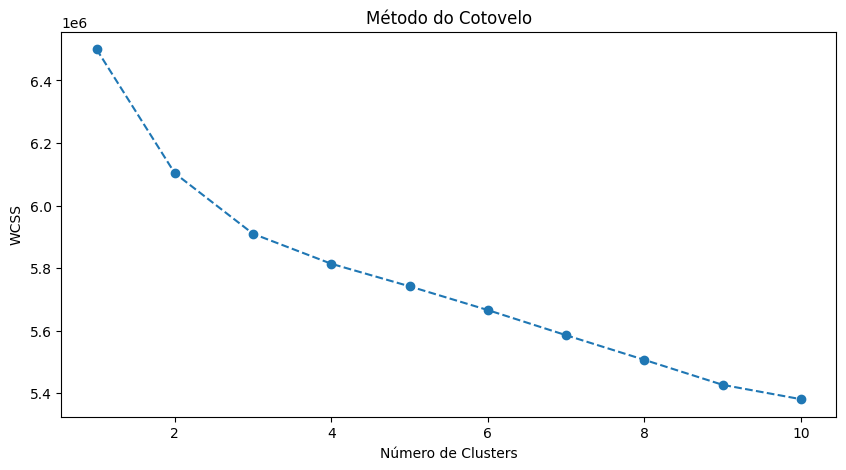

In [161]:
wcss = []  # Lista para armazenar a soma dos quadrados intra-cluster

# Testando até 10 clusters (ou qualquer outro número de sua escolha)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(train_data_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


Vamos utilizar 3 Clusters

In [162]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(train_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [163]:
# Adicionando os rótulos dos clusters ao seu DataFrame original
train_data['Cluster'] = clusters

# Verificando a média de cada característica por cluster
cluster_analysis = train_data.groupby('Cluster').mean()
print(cluster_analysis)


                Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
Cluster                                                                        
0        105.418318  175924.713926            2775.756034          19.795720   
1        107.498020  162003.828374            3696.011494          17.159960   
2        116.764144  190429.989351            5092.173091          15.416257   

         Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
Cluster                                                                     
0              24.530623      80.269420     5.322833            38.840873   
1              23.121569      73.848601     2.997111            19.803922   
2              20.634460      66.505235     1.645617            11.695494   

         Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
Cluster                                                                       
0                     33.528098             14.147946  

<ipython-input-163-94a1aa48cd3f>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = train_data.groupby('Cluster').mean()


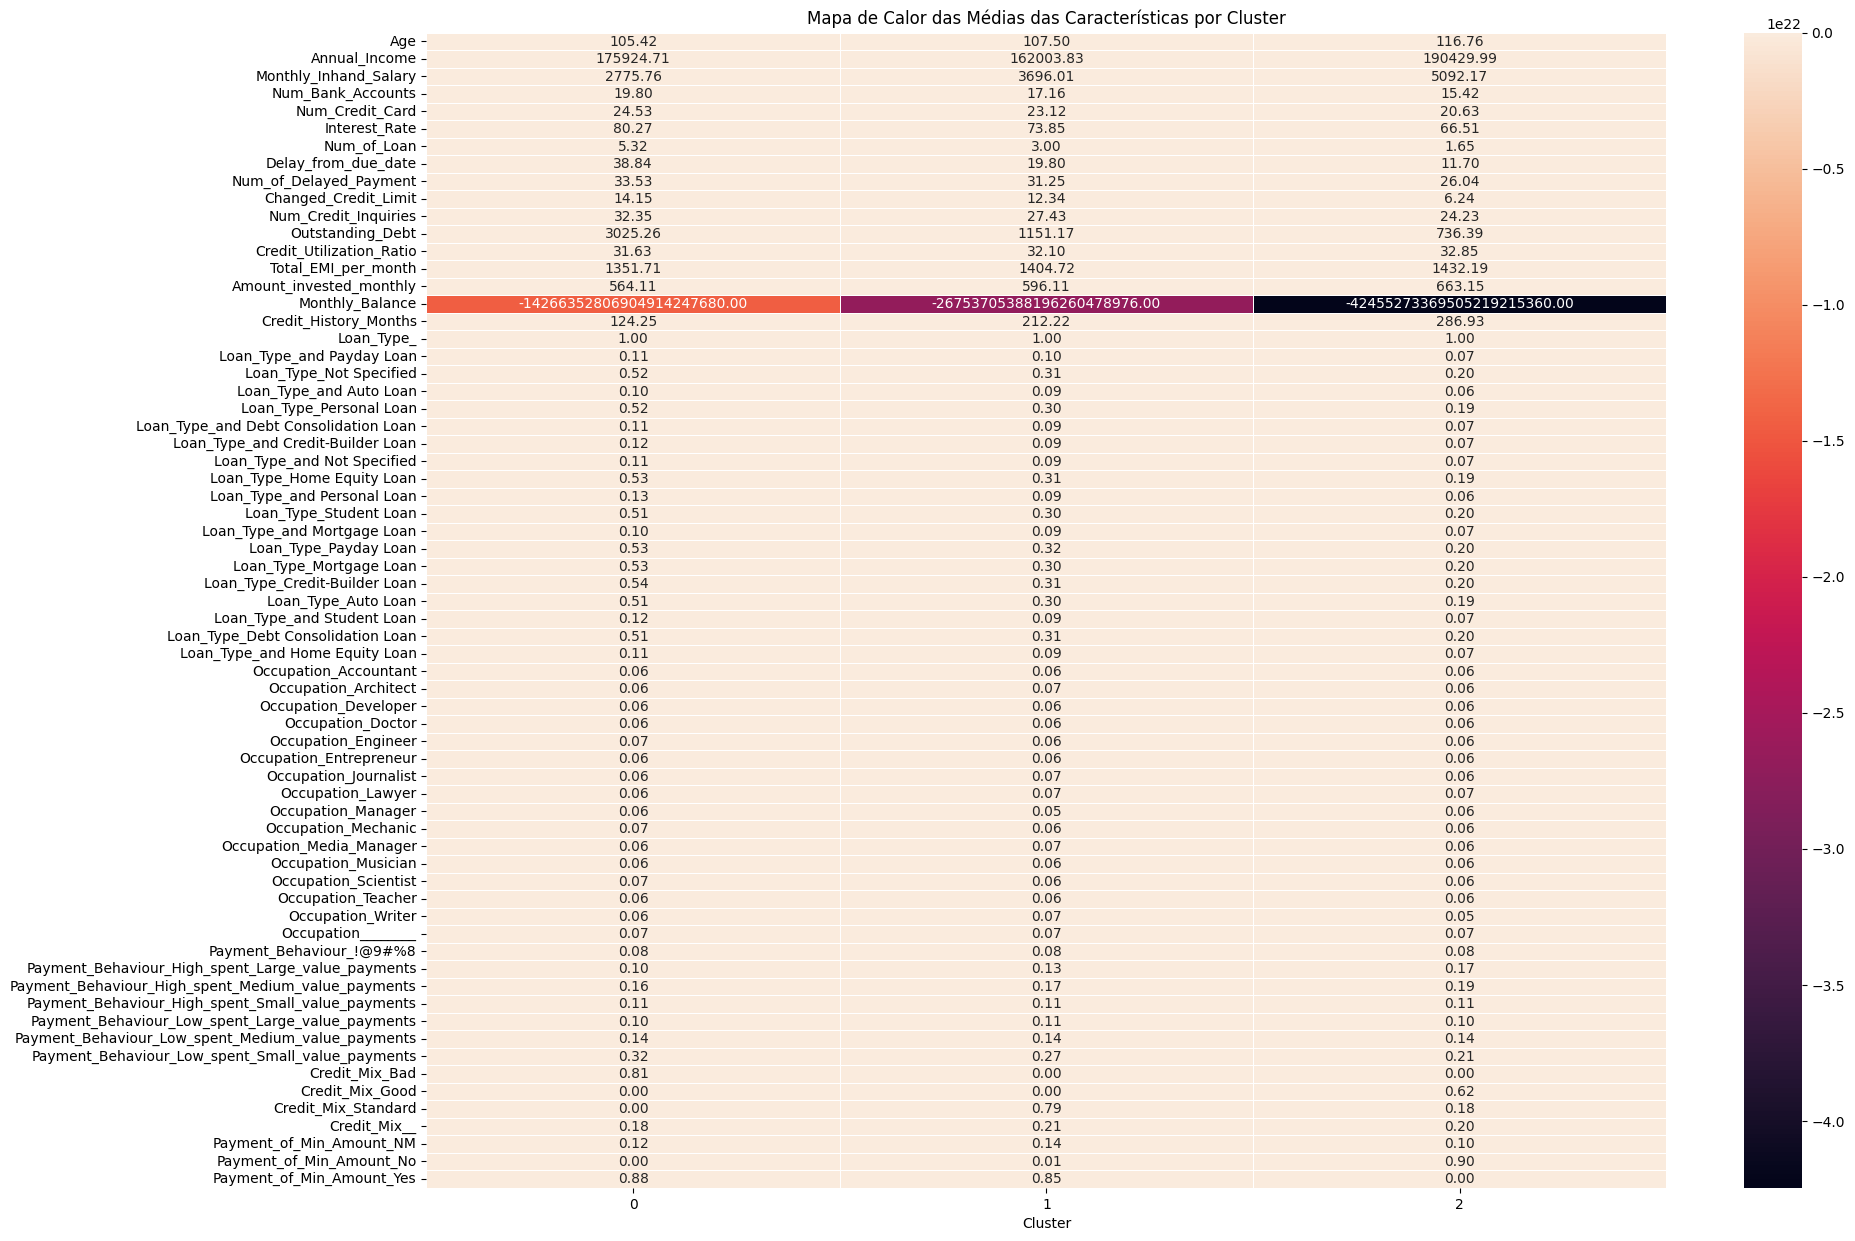

In [164]:
plt.figure(figsize=(20, 15))
sns.heatmap(cluster_analysis.transpose(), annot=True, fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor das Médias das Características por Cluster')
plt.show()


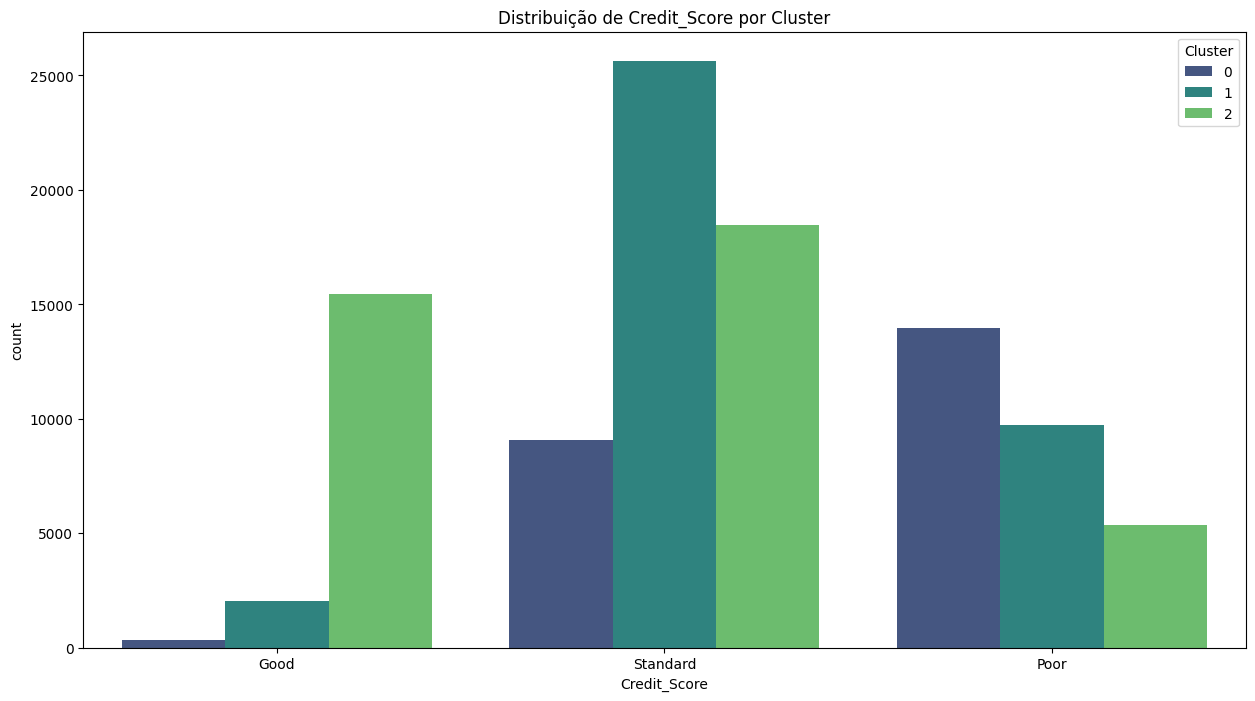

In [165]:
plt.figure(figsize=(15, 8))
sns.countplot(data=train_data, x='Credit_Score', hue='Cluster', palette='viridis')
plt.title('Distribuição de Credit_Score por Cluster')
plt.show()

In [166]:
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(test_data)

In [167]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(test_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [171]:
test_data['Cluster'] = clusters
test_data["RF_Prev"] = y_pred

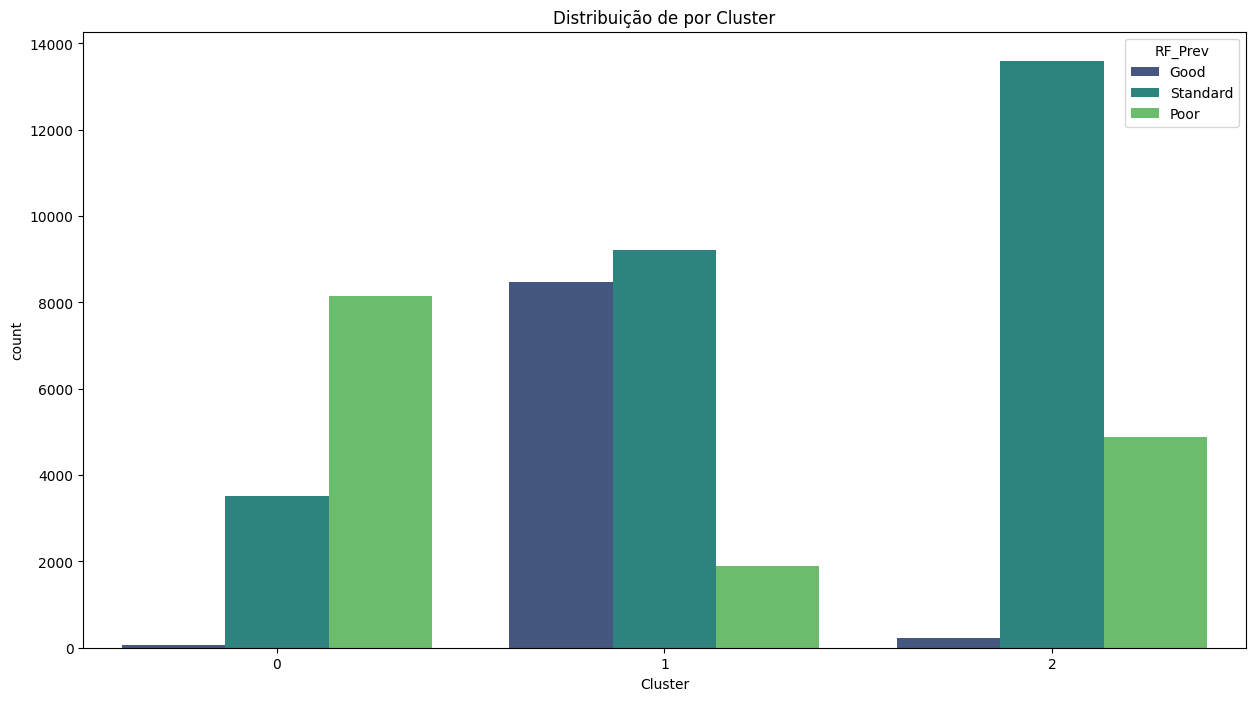

In [172]:
plt.figure(figsize=(15, 8))
sns.countplot(data=test_data, x='Cluster', hue='RF_Prev', palette='viridis')
plt.title('Distribuição de por Cluster')
plt.show()